# ML-7 Deep Learning

Pada materi kali ini, kita akan membangun sebuah model Deep Learning sederhana menggunakan TensorFlow-Keras.

## 1. Gathering Data

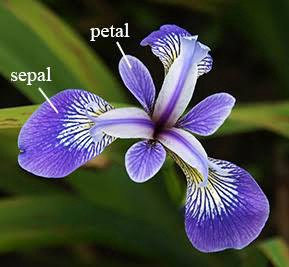

Kita akan menggunakan dataset sederhana untuk kasus klasifikasi, yakni dataset Iris.

Dataset Iris memiliki 4 feature (variable), antara lain:

<br>

Feature | Keterangan
---|---
SepalLengthCm | panjang sepal bunga Iris dalam ukuran cm
SepalWidthCm | lebar sepal bunga Iris dalam ukuran cm
PetalLengthCm | panjang kelopak bunga Iris dalam ukuran cm
PetalWidthCm | lebar kelopak

<br>

Dataset ini juga memiliki sebuah label dengan 3 buah class (jenis bunga Iris), yakni:

1. Iris Setosa
2. Iris Versicolor
3. Iris Virginica

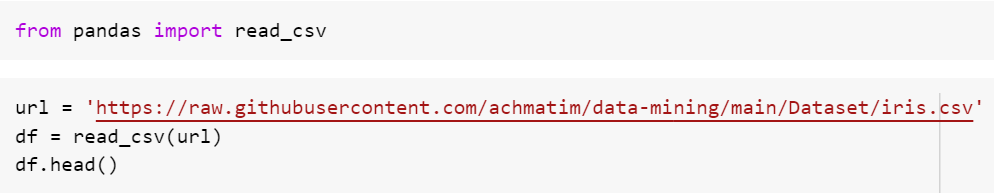

In [ ]:
from pandas import read_csv

In [ ]:
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(url)
df.head()

## 2. Preparing Data

Langkah selanjutnya adalah mengolah dataset sehingga siap digunakan untuk mentraining Deep Learning.

### A. Pisahkan feature (X) dan label (y) dari dataset

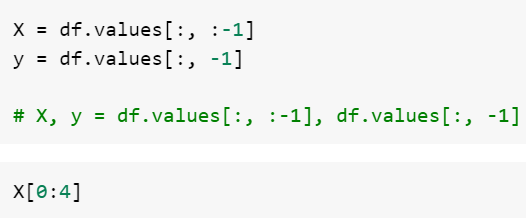

In [ ]:
X = df.values[:, :-1]
y = df.values[:, -1]

# X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
X[0:4]

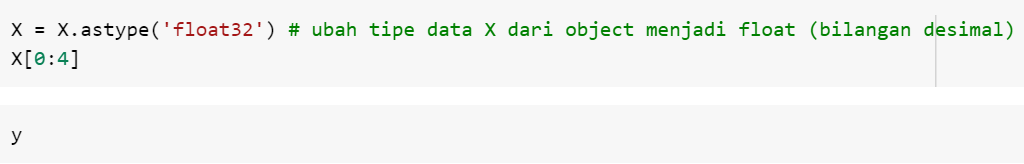

In [ ]:
X = X.astype('float32') # ubah tipe data X dari object menjadi float (bilangan desimal)
X[0:4]

In [ ]:
y

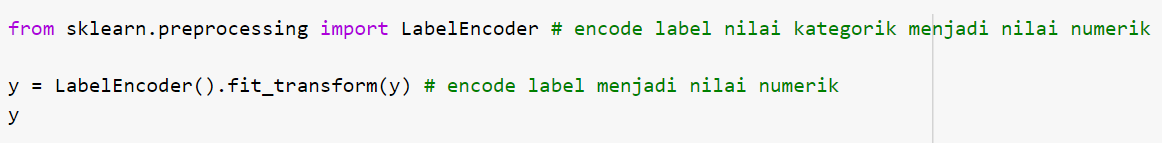

In [ ]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y

### B. Split Data menjadi training dan testing dataset



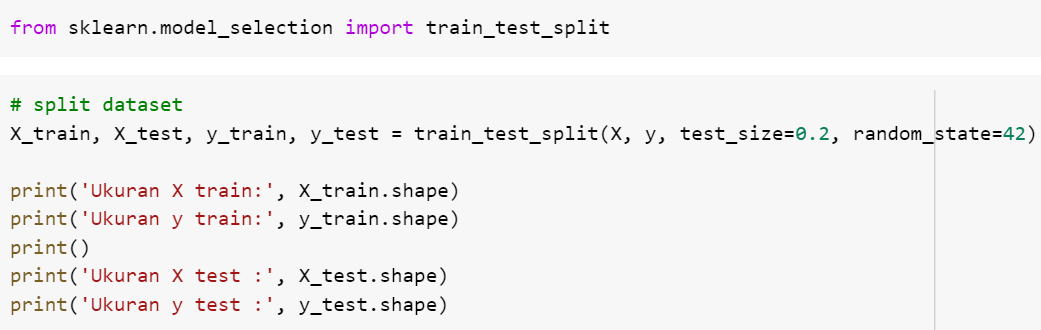

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Ukuran X train:', X_train.shape)
print('Ukuran y train:', y_train.shape)
print()
print('Ukuran X test:', X_test.shape)
print('Ukuran y test:', y_test.shape)

## 3. Deep Learning Model Life-Cycle (DLMLC)

Setelah data siap digunakan untuk men-train model, langkah selanjutnya adalah membangun model Deep Learning.

Deep Learning Model Life-Cycle (DLMLC) dapat kita gunakan sebagai pedoman dalam membangun model Deep Learning.

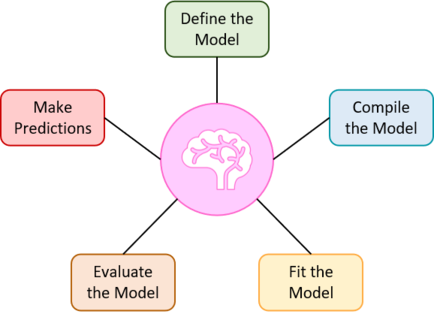

### A. Define the Model

Tahap pertama yang kita lakukan pada DLMLC adalah mendefinisikan model yang hendak dikembangkan. Kita harus menentukan arsitektur/topologi Deep Learning.

Arsitektur/Topologi Deep Learning sangat **bergantung pada dataset** yang kita miliki. Mari kita ingat lagi bentuk dataset Iris.

<br>

Dataset Iris memiliki 4 feature dan 3 class. Artinya, arsitektur Deep Learning yang kita bangun harus memiliki:
- Input layer dengan 4 neuron
- Output layer dengan 3 neuron

Kita bebas menentukan jumlah hidden layer dan neuron dalam tiap hidden layer.

<br>

Pada praktik kali ini, kita akan membangun Deep Learning dengan arsitektur/topologi sebagai berikut:



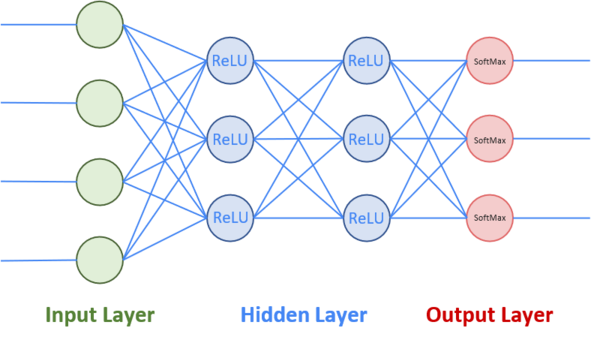

Arsitektur ini terdiri atas:
- Input layer dengan 4 neuron
- 2 Hidden layer, masing-masing hidden layer memiliki 3 neuron dan Activation Function ReLU
- Output layer dengan 3 neuron dengan Activation Function SoftMax

Kita memakai Activation Function SoftMax pada output layer karena dataset kita memiliki 3 buah class (Multi-Class Classification).

<br>

[TensorFlow-Keras Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

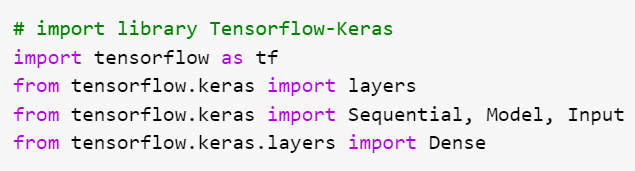

In [ ]:
# import library Tensorflow-Keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense

**Note:** Code Sequential API 1, Sequential API 2, dan Functional API di bawah menghasilkan arsitektur Deep Learning yang sama persis. **Cukup jalankan salah satu code**.

#### Define the Model using Sequential API 1

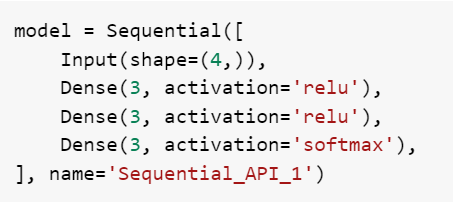

In [ ]:
model = Sequential([
   Input(shape=(4,)),
   Dense(3, activation='relu'),
   Dense(3, activation='relu'),
   Dense(3, activation='softmax'),
], name='Sequential_API_1')

#### Define the Model using Sequential API 2

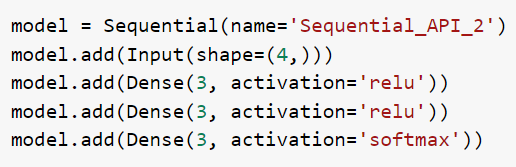

In [ ]:
model = Sequential (name='Sequential_API_2')
model.add(Input(shape=(4,)))
model.add(Dense (3, activation='relu'))
model.add(Dense (3, activation='relu'))
model.add(Dense (3, activation='softmax'))

#### Define the Model using Functional API

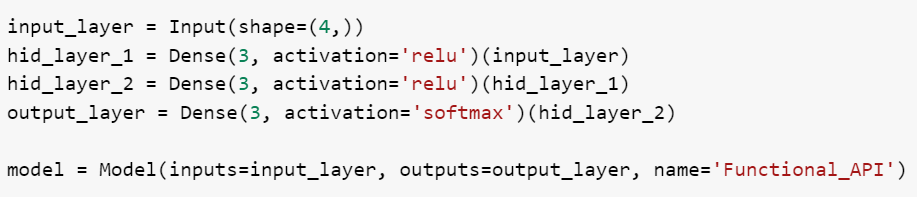

In [ ]:
input_layer = Input (shape=(4,))
hid_layer_1 = Dense (3, activation='relu') (input_layer)
hid_layer_2 = Dense(3, activation='relu') (hid_layer_1)
output_layer = Dense (3, activation='softmax') (hid_layer_2)
model = Model (inputs=input_layer, outputs=output_layer, name='Functional_API')

Pastikan arsitektur model yang dibangun sudah sesuai kebutuhan. Hal ini dapat dipastikan dengan memvisualisasikan model menggunakan Model Text Description dan Model Architecture Plot.

#### Model Text Description

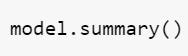

In [ ]:
model.summary()

#### Model Architecture Plot

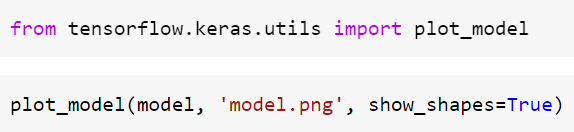

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

### B. Compile the Model

Pada tahap kedua DLMLC, dilakukan pemilihan loss function, optimizer, dan metrics untuk menilai performa model.

Loss Function | Implementasi
---|---
Mean Square Error (MSE) | Regression
Mean Absolute Error (MAE) | Regression
Binary Cross Entropy | Binary Classification
Categorical Cross Entropy | Multi-class Classification
Sparse Categorical Cross Entropy | Multi-class Classification

<br>

[TensorFlow-Keras Loss Function](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

Optimizer | Keterangan
---|---
SGD | Stochastic Gradient Descent
Momentum | SGD with Momentum
RMSprop | Root Mean Squared Propagation
AdaDelta | Adaptive Delta
AdaGrad | Adaptive Gradient Algorithm
Adam | Adaptive Moment Estimation

<br>

[TensorFlow Keras Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

Metrics |
--- |
Accuracy
Precission
Recall

<br>

[TensorFlow-Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


Kali ini kita memilih:
- loss : Sparse Categorical Cross Entropy
- optimizer : adam
- metrics : Accuracy

Sparse Categorical Cross Entropy cocok untuk Multi-Class Classification.

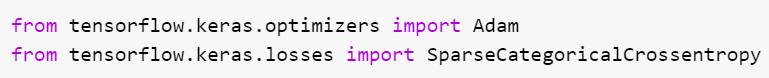

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

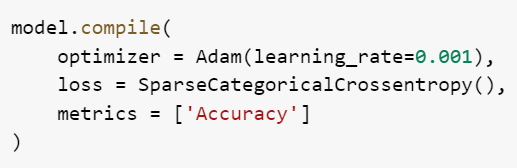

In [ ]:
model.compile(
    optimizer = Adam (learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics = ['Accuracy']

)

### C. Fit the Model

Tahap selanjutnya ialah melakukan training. Kita juga harus memilih konfigurasi training, seperti menentukan jumlah epoch dan batch size.

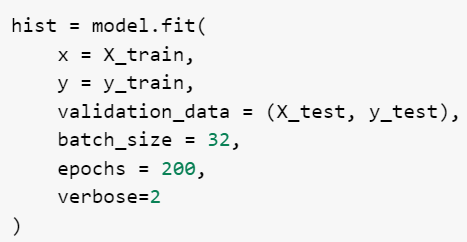

In [ ]:
hist = model.fit(
   x = X_train,
   y = y_train,
   validation_data = (X_test, y_test),
   batch_size = 32,
   epochs = 200,
   verbose=2

)

#### Plotting Learning Curves

Performa model setelah proses training bisa kita visualisasikan menggunakan learning curves (LCs).

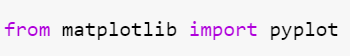

In [ ]:
from matplotlib import pyplot

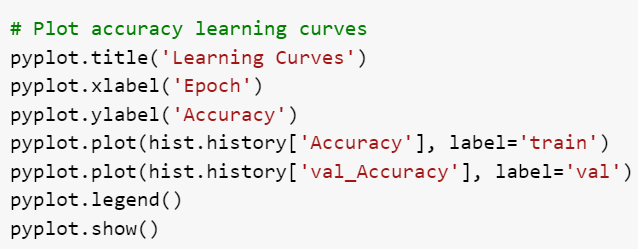

In [ ]:
# Plot accuracy learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(hist.history['Accuracy'], label='train')
pyplot.plot(hist.history['val_Accuracy'], label='val')
pyplot.legend()
pyplot.show()

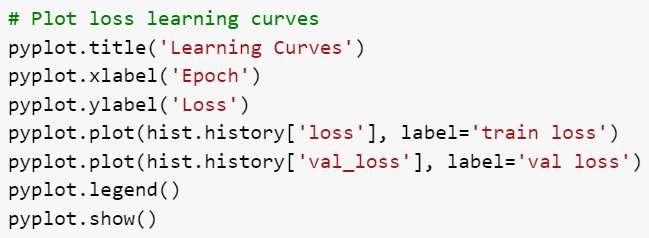

In [ ]:
# Plot loss learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history ['loss'], label='train loss')
pyplot.plot(hist.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.show()

Menurutmu, model Deep Learning yang kita bangun termasuk Overfit, Underfif, atau Goodfit? Kemukakan alasannya!

### D. Evaluate the Model

Tahap keempat DLMLC adalah mengevaluasi model menggunakan testing dataset.

Evaluasi model dilakukan dengan cara memberikan testing dataset pada model untuk diprediksi.

Hasil prediksi model selanjutnya akan dibandingkan dengan label/target yang diharapkan.

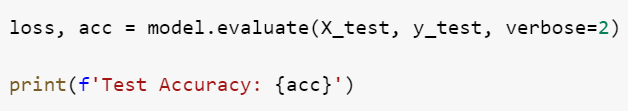

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

### E. Make Prediction

Tahap terakhir yang kita lakukan pada DLMLC adalah memanfaatkan model yang telah dibangun untuk memprediksi data baru.

Data baru yang dimaksud bukan merupakan bagian dari training set ataupun testing set, melainkan data yang benar-benar “baru” atau data tanpa label.

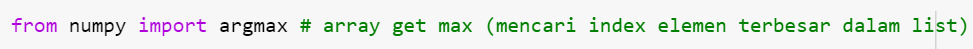

In [ ]:
from numpy import argmax # array get max (mencari index elemen terbesar dalam list)

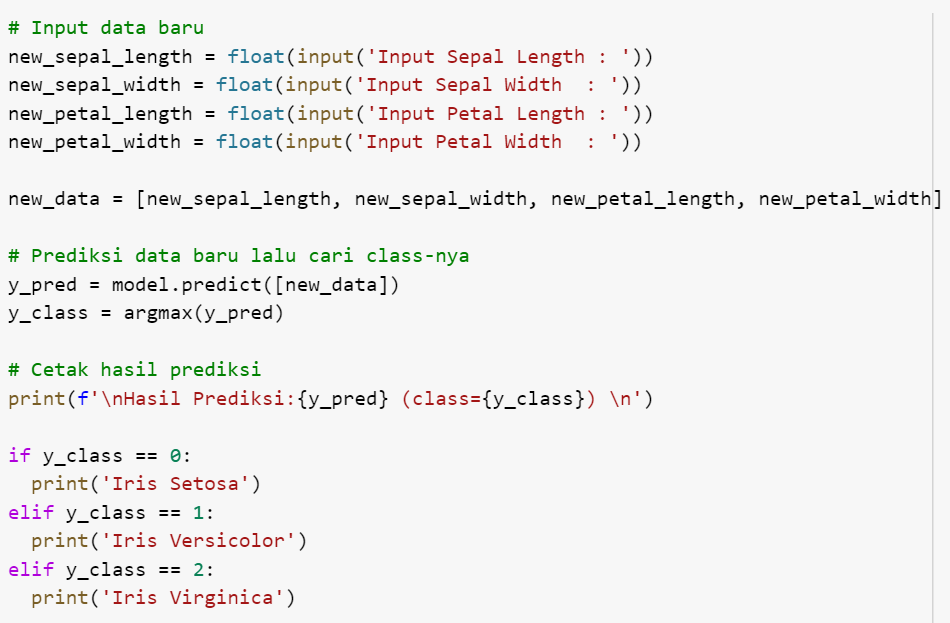

In [ ]:
# Input data baru
new_sepal_length = float(input('Input Sepal Length : '))
new_sepal_width = float(input('Input Sepal Width  : '))
new_petal_length = float(input('Input Petal Length : '))
new_petal_width = float(input('Input Petal Width  : '))

new_data = [new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]

# Prediksi data baru lalu cari class-nya
y_pred = model.predict([new_data])
y_class = argmax(y_pred)

# Cetak hasil prediksi
print(f'\nHasil Prediksi:{y_pred} (class={y_class}) \n')

if y_class == 0:
    print('Iris Setosa')
elif y_class == 1:
    print('Iris Versicolor')
elif y_class == 2:
    print('Iris Virginica')

#### Save Model

Alasan kita menyimpan model:
- Model yang disimpan dalam file tidak akan hilang ketika program ditutup, karena file bersifat persistent.
- Model dapat di-training ulang di kemudian hari.
- Model dapat di-load/di-export/di-deploy ke berbagai platform (web, smartphone, embedded device) untuk memprediksi data baru.

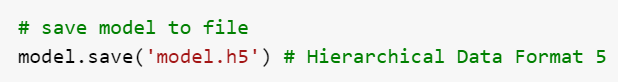

In [ ]:
# save model to file
model.save('model.h5') # Hierarchical Data Format 5

**Note:** Jangan lupa men-download file model yang sudah di-save! Model yang lupa di-download akan hilang saat Colab ditutup!

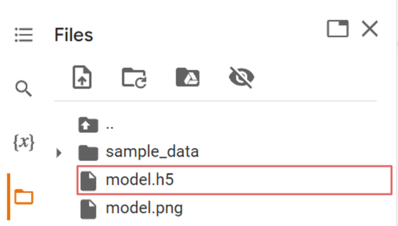

#### Load Model

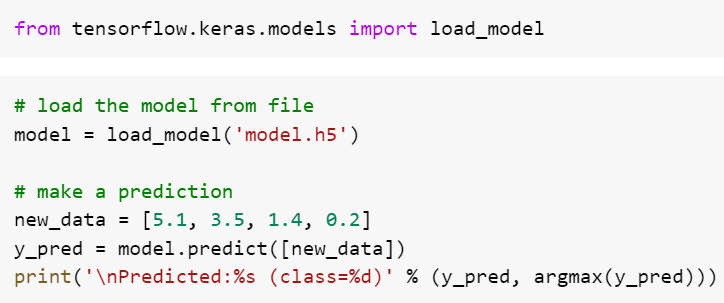

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from keras.models import load_model
import numpy as np
from numpy import argmax

# Load the model
model = load_model('model.h5')

# Prepare input data
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])

# Make a prediction
y_pred = model.predict(new_data)
print('\nPredicted: %s (class=%d)' % (y_pred, argmax(y_pred)))

# Deep Learning Techniques

Coba tambahkan Dropout atau Batch Normalization dalam arsitektur Deep Learning yang sudah kita bangun sebelumnya!

Jangan lupa run ulang code DLMLC!

## Dropout

Dropout  termasuk salah satu teknik yang bisa kita terapkan untuk **mencegah overfitting**.

Dropout adalah mengabaikan neuron pada layer tertentu secara acak selama proses training berlangsung.

“Mengabaikan” maksudnya ialah tidak mengikutsertakan neuron pada tahap forward pass dan backward pass.

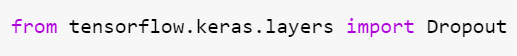

In [ ]:
from tensorflow.keras.layers import Dropout

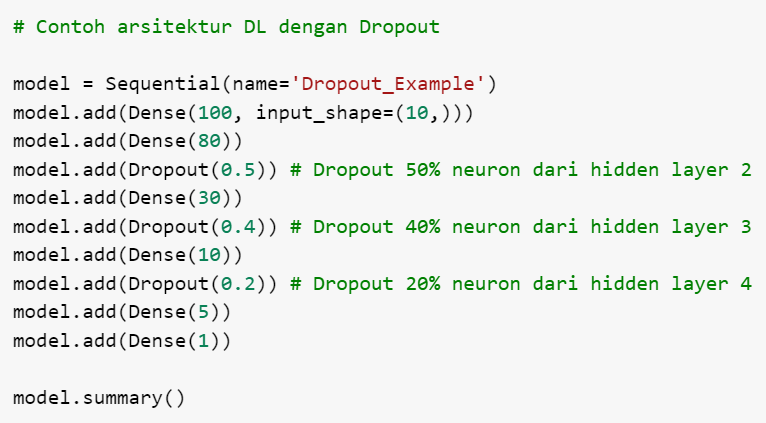

In [ ]:
# Contoh arsitektur DL dengan Dropout

model = Sequential(name='Dropout_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dropout(0.5)) # Dropout 50% neuron dari hidden layer 2
model.add(Dense(30))
model.add(Dropout(0.4)) # Dropout 40% neuron dari hidden layer 3
model.add(Dense(10))
model.add(Dropout(0.2)) # Dropout 20% neuron dari hidden layer 4
model.add(Dense(5))
model.add(Dense(1))

model.summary()

## Batch Normalization


Batch normalization juga termasuk salah satu teknik yang bisa kita terapkan untuk **mencegah overfitting**.

Batch normalization adalah melakukan operasi standarisasi dan normalisasi input sebuah layer yang berasal dari layer sebelumnya.

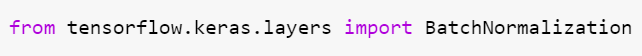

In [ ]:
from tensorflow.keras.layers import BatchNormalization

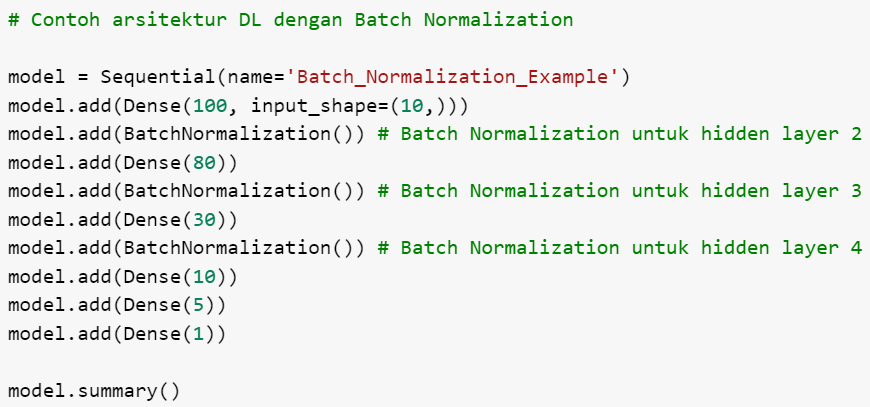

In [ ]:
# Contoh arsitektur DL dengan Batch Normalization

model = Sequential(name='Batch_Normalization_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(BatchNormalization())  # Batch Normalization untuk hidden layer 2
model.add(Dense(80))
model.add(BatchNormalization())  # Batch Normalization untuk hidden layer 3
model.add(Dense(30))
model.add(BatchNormalization())  # Batch Normalization untuk hidden layer 4
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

# Tugas

Bangun sebuah model DL untuk dataset berikut [ini](https://drive.google.com/file/d/1gnWGSTlr0QgJAyxUszEKvtRtCVR0qS6Y/view?usp=sharing).

Nilai latihan akan diambil dari:
1. kompleksitas model,
2. accuracy, dan
2. hasil evaluasi (good fit atau tidak)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load dataset
data = pd.read_csv('diabetes_dataset.csv')

# 2. Handle unrealistic values by imputing them with median
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_impute:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)

# 3. Split features and labels
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 4. Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build a Sequential Neural Network Model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# 7. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# 9. Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# 10. Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
